# **4_Modeling**

In [ ]:
%%bash
apt-get update
apt-get install g++ openjdk-8-jdk python-dev python3-dev
pip3 install JPype1
pip3 install konlpy

In [113]:
%env JAVA_HOME "/usr/lib/jvm/java-8-openjdk-amd64"

env: JAVA_HOME="/usr/lib/jvm/java-8-openjdk-amd64"


In [ ]:
%%bash
bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)
pip3 install /tmp/mecab-python-0.996

In [ ]:
import konlpy
from konlpy.tag import Kkma, Komoran, Hannanum, Okt
from konlpy.utils import pprint
from konlpy.tag import Mecab

In [ ]:
m = Mecab()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import sklearn as sk

In [ ]:
import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
from google.colab import auth
auth.authenticate_user()

from google.colab import drive
drive.mount('/content/gdrive', force_remount=False)

Mounted at /content/gdrive


In [ ]:
train = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/NLP_news_topic_classification/preprocessed_train.csv")
test = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/NLP_news_topic_classification/preprocessed_test.csv")

In [ ]:
itsci = train[train["topic_idx"]==0]
econ = train[train["topic_idx"]==1]
society = train[train["topic_idx"]==2]
lifestyle = train[train["topic_idx"]==3]
world = train[train["topic_idx"]==4]
sports = train[train["topic_idx"]==5]
politic = train[train["topic_idx"]==6]

In [ ]:
# 전처리 과정에서 불필요한 컬럼 생겨서 삭제 후 index 컬럼을 컬럼으로
train = train.drop(columns=["Unnamed: 0"])
test = test.drop(columns=["Unnamed: 0"])

In [ ]:
# 동의어 갤 -> 갤럭시 수정하면서 '갤럭시럭시' 된 것 수정하고 oversampling까지 완료한 train셋셋
train

,title,topic_idx
0,인천에서핀란드 항공기 결항 휴가철 여행객 분통,4
1,실리콘밸리 넘어서겠다 구글 15조원 들여 미국전역 거점화,4
2,이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것,4
3,NYT 클린턴 측근한국기업 특수관계 조명 공과 사 맞물려,4
4,시진핑 트럼프에 중미 무역협상 조속 타결 희망,4
...,...,...
53398,국토위 태풍상륙날 국감장 떠난 이강래 행적 놓고 여야 공방,6
53399,김정은 신년사로 미리 본 북한7차 당대회 역사적 분수령,6
53400,박근혜대통령 또 북한주민에 메시지 김정은주민 분리전략 본격화,6
53401,김관영 내일 탈당 이번주 더민주 이탈 현역 8명 전후,6


### train_test_split  
나눠야하는 줄 알았는데 아래 보니 모델 돌리면서 파라미터로 train, valid 셋 나눌 수 있음음

In [ ]:
# from sklearn.model_selection import train_test_split

In [ ]:
# X = train["title"]
# y = train["topic_idx"]

# train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.4, shuffle=True, stratify=y, random_state=17)
# # stratify : train, valid 나눌 때 각 레이블의 분포 고르도록 나눔 

In [ ]:
# print("< train 레이블별 비율 >")
# for i in range(7):
#   print("topic", i, round(train_y.value_counts()[i]/len(train_y) * 100, 2),"%")

< train 레이블별 비율 >
topic 0 14.28 %
topic 1 14.28 %
topic 2 14.28 %
topic 3 14.29 %
topic 4 14.29 %
topic 5 14.28 %
topic 6 14.28 %


In [ ]:
# print("< test 레이블별 비율 >")
# for i in range(7):
#   print("topic", i, round(test_y.value_counts()[i]/len(test_y) * 100, 2),"%")

< test 레이블별 비율 >
topic 0 14.29 %
topic 1 14.29 %
topic 2 14.29 %
topic 3 14.28 %
topic 4 14.28 %
topic 5 14.29 %
topic 6 14.29 %


## 언어 모델  
references :   
https://heytech.tistory.com/341  
https://velog.io/@dust_potato/TIL-nlp-%EC%96%B8%EC%96%B4%EB%AA%A8%EB%8D%B8%EC%9D%98-%EC%A2%85%EB%A5%98
  
  
1. **통계학적 언어 모델**
- 조건부 확률의 연쇄법칙  
단어들이 주어졌을 때 뒤이어 등장할 단어를 확률적으로 표현, 문장 자체의 확률적 표현 (앤드류 응 교수님 강의에서 배웠던 내용)  
- N-gram 모델
  
  
2. **인공신경망 기반 언어 모델**
- 최근에는 통계학적 언어 모델보다 인공신경망 기반 모델이 성능 더 좋다.
- **RNN (- RNN, LSTM, GRU)**, T5, **BERT**, GPT

## **RNN**  
references :  
https://wikidocs.net/22891  
https://wikidocs.net/22894  
https://tensorflow.blog/%EC%BC%80%EB%9D%BC%EC%8A%A4-%EB%94%A5%EB%9F%AC%EB%8B%9D/3-5-%EB%89%B4%EC%8A%A4-%EA%B8%B0%EC%82%AC-%EB%B6%84%EB%A5%98-%EB%8B%A4%EC%A4%91-%EB%B6%84%EB%A5%98-%EB%AC%B8%EC%A0%9C/  
  

텍스트 분류는 **RNN의 다대일** : 최종 시점의 RNN셀만 은닉상태 출력, 출력층으로 가서 활성화함수를 통해 정답을 고르는 문제  
  
* 이중분류 - 출력층의 활성화 함수: sigmoid, 손실함수: binary_crossentropy  
* 다중분류 - 출력층의 활성화 함수: softmax, 손실함수: categorical_crossentropy + 출력층 뉴런의 개수는 N (클래스 개수) 개

In [115]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [116]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.model_selection import StratifiedKFold

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Dropout, Bidirectional
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model, to_categorical
from tensorflow.keras.optimizers import Adam

from keras.utils import np_utils

#### 1) Vectorization - Tokenization

In [132]:
train_X = np.array([x for x in train["title"]])
test_X = np.array([x for x in test["title"]])
train_y = np.array([x for x in train["topic_idx"]])

print(train_X.shape)
print(test_X.shape)
print(train_y.shape)

(53403,)
(9131,)
(53403,)


In [134]:
# keras Tokenizer로 train set에 대해서 토큰화와 정수 인코딩
# Tokenizer은 데이터에 출현하는 모든 단어의 개수를 세고 빈도 수로 정렬함 (각 단어의 빈도수가 높을수록 낮은 정수가 부여됨)
# num_words에 지정된만큼만 숫자로 반환, 나머지는 0으로
vocab_size = 2000  # total_count - rare_count + 1
tokenizer = Tokenizer(num_words = vocab_size)
tokenizer.fit_on_texts(train_X)  # tokenizer에 데이터를 입력력

In [135]:
# 문장 내 모든 단어를 시퀀스 번호로 변환
sequences_train = tokenizer.texts_to_sequences(train_X)
sequences_test = tokenizer.texts_to_sequences(test_X)

print(len(sequences_train), len(sequences_test))

53403 9131


#### 2 ) Embedding

In [136]:
# 변환된 시퀀스 번호를 이용해 단어 임베딩 벡터 생성
word_index = tokenizer.word_index

In [137]:
# 각 단어에 대한 등장 빈도수

threshold = 2
total_count = len(word_index)  # 총 단어 수
rare_count = 0   # 등장 빈도수가 threshold보다 작은 단어의 개수 count
total_freq = 0   # 훈련 데이터의 전체 단어 빈도수 총합
rare_freq = 0    # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수 총합

# tokenizer.word_counts.item() : 각 단어와 빈도수를 쌍으로 받음음
for key, value in tokenizer.word_counts.items():
  total_freq += value

  if (value < threshold):
    rare_count += 1
    rare_freq += value

print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_count))
print("단어 집합에서 희귀 단어 비율 :", round((rare_count / total_count)*100, 2))
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율 :", round((rare_freq / total_freq )*100, 2))
  

등장 빈도가 1번 이하인 희귀 단어의 수: 47086
단어 집합에서 희귀 단어 비율 : 55.58
전체 등장 빈도에서 희귀 단어 등장 빈도 비율 : 12.36


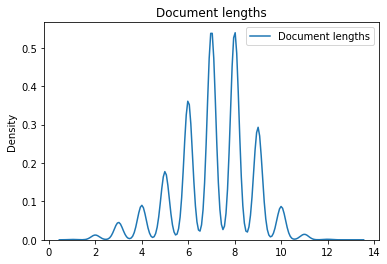

longest : 13


In [130]:
# 독립 변수 전처리
# 패딩(텍스트 길이 맞춰줌)을 위한 제목의 최대길이와 길이분포 확인인

train["doc_len"] = train.title.apply(lambda words : len(words.split()))

def plot_doc_lengths(df):
  mean_seq_len = np.round(df.doc_len.mean()).astype(int)
  sns.distplot(tuple(df.doc_len), hist=False, kde=True, label="Document lengths")
  plt.title("Document lengths")
  plt.legend()
  plt.show()
  print("longest :", train["doc_len"].max())

plot_doc_lengths(train)

In [139]:
# 모든 제목의 길이를 13으로 패딩 (13보다 짧으면 0이 패딩됨)
max_len = 13

train_X = pad_sequences(sequences_train, padding="post", maxlen=max_len)
test_X = pad_sequences(sequences_test, padding="post", maxlen=max_len)
print("train shape :", train_X.shape)
print("test shape :", test_X.shape)

train shape : (53403, 13)
test shape : (9131, 13)


In [140]:
# 종속변수 데이터 전처리
train_y = np_utils.to_categorical(train_y) # train_y 원핫 인코딩
print(train_y)
print(train_y.shape)

[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]
(53403, 7)


#### 3 ) Modeling  
#### **Simple RNN**   
reference : https://ratsgo.github.io/natural%20language%20processing/2017/03/09/rnnlstm/  
  

- 히든노드가 방향을 가진 엣지로 연결돼 순환구조를 이루는 - 인공신경망의 한 종류  
음성, 문자 등 sequential한 데이터에 적합   
- 시퀀스 길이에 관계없이 input, output 받아들일 수 있는 점이 장점 (다대다, 다대일, 일대다 등)  
- input -> hidden state -> output

In [ ]:
from tensorflow.keras.layers import SimpleRNN, Embedding, Dense
from tensorflow.keras.models import Sequential
from keras import models
from keras import layers

In [141]:
# 파라미터 설정 
embedding_dim = 200
vocab_size = total_count - rare_count + 1 # 1번만 쓰인 단어 제외
max_len = 13   # 위 참고

In [142]:
# RNN 모델
rnn = Sequential([Embedding(vocab_size, embedding_dim, input_length=max_len),
                    tf.keras.layers.SimpleRNN(units = 64, return_sequences=True),
                    tf.keras.layers.SimpleRNN(units = 64, return_sequences = True),
                    tf.keras.layers.SimpleRNN(units = 64), 
                    Dense(7, activation="softmax")])   # 출력층 : 7개의 output(topic_idx), 다중분류이므로 softmax
            
rnn.compile(loss="categorical_crossentropy",
               optimizer="adam",
               metrics=["accuracy"])

rnn.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 13, 200)           400000    
                                                                 
 simple_rnn_15 (SimpleRNN)   (None, 13, 64)            16960     
                                                                 
 simple_rnn_16 (SimpleRNN)   (None, 13, 64)            8256      
                                                                 
 simple_rnn_17 (SimpleRNN)   (None, 64)                8256      
                                                                 
 dense_6 (Dense)             (None, 7)                 455       
                                                                 
Total params: 433,927
Trainable params: 433,927
Non-trainable params: 0
_________________________________________________________________


In [158]:
# 모델 실행
rnn_history = rnn.fit(train_X, train_y, epochs=20, batch_size=100, validation_split=0.2)

Epoch 1/20
428/428 [==============================] - 18s 42ms/step - loss: 0.2884 - accuracy: 0.8941 - val_loss: 0.6396 - val_accuracy: 0.8243
Epoch 2/20
428/428 [==============================] - 17s 40ms/step - loss: 0.2826 - accuracy: 0.8949 - val_loss: 0.6034 - val_accuracy: 0.8388
Epoch 3/20
428/428 [==============================] - 13s 30ms/step - loss: 0.2795 - accuracy: 0.8963 - val_loss: 0.6104 - val_accuracy: 0.8335
Epoch 4/20
428/428 [==============================] - 11s 26ms/step - loss: 0.2764 - accuracy: 0.8968 - val_loss: 0.6256 - val_accuracy: 0.8370
Epoch 5/20
428/428 [==============================] - 12s 28ms/step - loss: 0.2873 - accuracy: 0.8931 - val_loss: 0.6327 - val_accuracy: 0.8266
Epoch 6/20
428/428 [==============================] - 13s 29ms/step - loss: 0.2830 - accuracy: 0.8944 - val_loss: 0.6851 - val_accuracy: 0.8109
Epoch 7/20
428/428 [==============================] - 13s 30ms/step - loss: 0.2756 - accuracy: 0.8978 - val_loss: 0.6129 - val_accuracy:

<function matplotlib.pyplot.show(*args, **kw)>

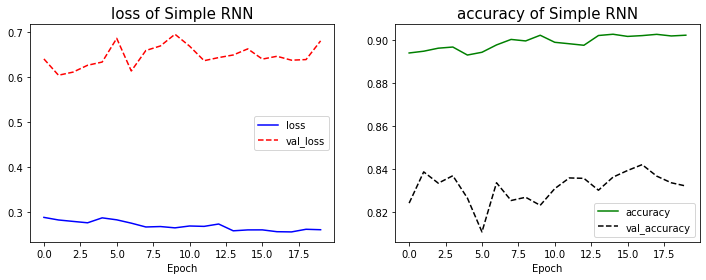

In [159]:
# 결과 확인
plt.figure(figsize=(12,4))
plt.title("Simple RNN", fontsize=15)

plt.subplot(1, 2, 1)
plt.title("loss of Simple RNN", fontsize=15)
plt.plot(rnn_history.history["loss"],'b-', label='loss')
plt.plot(rnn_history.history["val_loss"], 'r--', label="val_loss")
plt.xlabel("Epoch")
plt.legend()

plt.subplot(1, 2, 2)
plt.title("accuracy of Simple RNN", fontsize=15)
plt.plot(rnn_history.history["accuracy"], "g-", label="accuracy")
plt.plot(rnn_history.history["val_accuracy"], "k--", label="val_accuracy")
plt.xlabel("Epoch")
plt.legend()

plt.show

In [154]:
# vocab_size = 2000으로 가장 많이 사용하는 사이즈라고 함
# 위에서는 vocab_size = 1번 쓰인 단어 제외한 모든 단어들로 했음
embedding_dim = 200
vocab_size = 2000 # 1번만 쓰인 단어 제외
max_len = 13   # 위 참고

In [155]:
# RNN 모델
rnn = Sequential([Embedding(vocab_size, embedding_dim, input_length=max_len),
                    tf.keras.layers.SimpleRNN(units = 64, return_sequences=True),
                    tf.keras.layers.SimpleRNN(units = 64, return_sequences = True),
                    tf.keras.layers.SimpleRNN(units = 64), 
                    Dense(7, activation="softmax")])   # 출력층 : 7개의 output(topic_idx), 다중분류이므로 softmax
            
rnn.compile(loss="categorical_crossentropy",
               optimizer="adam",
               metrics=["accuracy"])

rnn.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 13, 200)           400000    
                                                                 
 simple_rnn_18 (SimpleRNN)   (None, 13, 64)            16960     
                                                                 
 simple_rnn_19 (SimpleRNN)   (None, 13, 64)            8256      
                                                                 
 simple_rnn_20 (SimpleRNN)   (None, 64)                8256      
                                                                 
 dense_7 (Dense)             (None, 7)                 455       
                                                                 
Total params: 433,927
Trainable params: 433,927
Non-trainable params: 0
_________________________________________________________________


In [156]:
# 모델 실행
rnn_history = rnn.fit(train_X, train_y, epochs=20, batch_size=100, validation_split=0.2)

Epoch 1/20
428/428 [==============================] - 15s 30ms/step - loss: 0.9608 - accuracy: 0.6741 - val_loss: 0.7893 - val_accuracy: 0.7212
Epoch 2/20
428/428 [==============================] - 14s 33ms/step - loss: 0.7157 - accuracy: 0.7588 - val_loss: 0.6960 - val_accuracy: 0.7802
Epoch 3/20
428/428 [==============================] - 13s 29ms/step - loss: 0.6539 - accuracy: 0.7757 - val_loss: 0.7407 - val_accuracy: 0.7588
Epoch 4/20
428/428 [==============================] - 13s 29ms/step - loss: 0.5978 - accuracy: 0.7921 - val_loss: 0.6106 - val_accuracy: 0.8029
Epoch 5/20
428/428 [==============================] - 12s 29ms/step - loss: 0.5539 - accuracy: 0.8050 - val_loss: 0.6595 - val_accuracy: 0.7875
Epoch 6/20
428/428 [==============================] - 11s 26ms/step - loss: 0.5184 - accuracy: 0.8163 - val_loss: 0.6351 - val_accuracy: 0.7945
Epoch 7/20
428/428 [==============================] - 12s 28ms/step - loss: 0.4860 - accuracy: 0.8266 - val_loss: 0.6041 - val_accuracy:

<function matplotlib.pyplot.show(*args, **kw)>

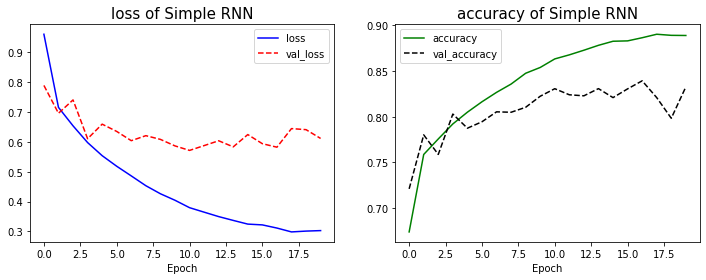

In [157]:
# 결과 확인
plt.figure(figsize=(12,4))
plt.title("Simple RNN", fontsize=15)

plt.subplot(1, 2, 1)
plt.title("loss of Simple RNN", fontsize=15)
plt.plot(rnn_history.history["loss"],'b-', label='loss')
plt.plot(rnn_history.history["val_loss"], 'r--', label="val_loss")
plt.xlabel("Epoch")
plt.legend()

plt.subplot(1, 2, 2)
plt.title("accuracy of Simple RNN", fontsize=15)
plt.plot(rnn_history.history["accuracy"], "g-", label="accuracy")
plt.plot(rnn_history.history["val_accuracy"], "k--", label="val_accuracy")
plt.xlabel("Epoch")
plt.legend()

plt.show

vocab_size 큰 차이는 아니지만 2000보다 빈도수 1인 단어들 제외한 것이 더 결과 좋음 -> 앞으로 빈도수 1인 단어들 제외한 것만 사용

### **LSTM (Long Short-Term Memory model)**  
references :   
https://dacon.io/competitions/official/235747/codeshare/2907?page=2&dtype=recent  
https://wikidocs.net/22933    
  
- LSTM은 RNN의 한종류, 긴 의존 기간을 필요로하는 학습을 수행할 능력 有  
ex : I grew up in Frace ...... I speak fluent *French* : French 예측하려면 한참 전에 가야하는데 RNN은 힘들어함 (정보와 관련정보를 사용하는 지점 사이의 거리가 멀 경우 역전파시 gradient가 줄어 학습능력 크게 저하 : vanishing gradient problem)
- RNN의 hidden state 에 cell-state를 추가한 구조


#### 단방향 : 정방향 only

In [160]:
vocab_size = total_count - rare_count + 1
embedding_dim = 200
max_len = 13

In [161]:
# LSTM 레이어를 사용한 모델 정의
lstm1 = Sequential([Embedding(vocab_size, embedding_dim, input_length = max_len),
                    tf.keras.layers.LSTM(units = 64, return_sequences = True),
                    tf.keras.layers.LSTM(units = 64, return_sequences = True),
                    tf.keras.layers.LSTM(units = 64),
                    Dense(7, activation="softmax")])

lstm1.compile(loss = "categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])
lstm1.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 13, 200)           7525800   
                                                                 
 lstm (LSTM)                 (None, 13, 64)            67840     
                                                                 
 lstm_1 (LSTM)               (None, 13, 64)            33024     
                                                                 
 lstm_2 (LSTM)               (None, 64)                33024     
                                                                 
 dense_8 (Dense)             (None, 7)                 455       
                                                                 
Total params: 7,660,143
Trainable params: 7,660,143
Non-trainable params: 0
_________________________________________________________________


In [162]:
# 단방향 lstm 실행
lstm1_history = lstm1.fit(train_X, train_y, epochs=20, batch_size=100, validation_split=0.2)

Epoch 1/20
428/428 [==============================] - 121s 270ms/step - loss: 1.0425 - accuracy: 0.6205 - val_loss: 0.7920 - val_accuracy: 0.7479
Epoch 2/20
428/428 [==============================] - 102s 239ms/step - loss: 0.7638 - accuracy: 0.7450 - val_loss: 0.7629 - val_accuracy: 0.7549
Epoch 3/20
428/428 [==============================] - 98s 230ms/step - loss: 0.7232 - accuracy: 0.7584 - val_loss: 0.7359 - val_accuracy: 0.7691
Epoch 4/20
428/428 [==============================] - 99s 231ms/step - loss: 0.6903 - accuracy: 0.7669 - val_loss: 0.7401 - val_accuracy: 0.7650
Epoch 5/20
428/428 [==============================] - 77s 181ms/step - loss: 0.6669 - accuracy: 0.7728 - val_loss: 0.7124 - val_accuracy: 0.7747
Epoch 6/20
428/428 [==============================] - 79s 185ms/step - loss: 0.6468 - accuracy: 0.7787 - val_loss: 0.6934 - val_accuracy: 0.7754
Epoch 7/20
428/428 [==============================] - 101s 235ms/step - loss: 0.6321 - accuracy: 0.7813 - val_loss: 0.6793 - val

<function matplotlib.pyplot.show(*args, **kw)>

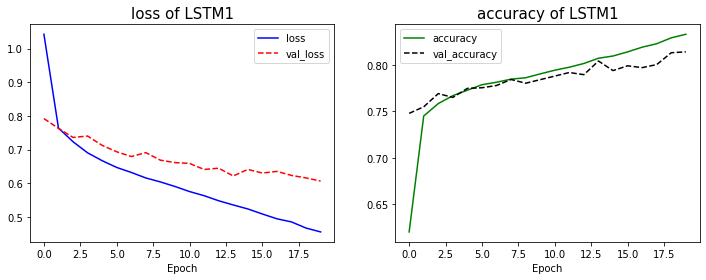

In [164]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.title("loss of LSTM1", fontsize=15)
plt.plot(lstm1_history.history["loss"],'b-', label="loss")
plt.plot(lstm1_history.history["val_loss"], "r--", label="val_loss")
plt.xlabel("Epoch")
plt.legend()

plt.subplot(1, 2, 2)
plt.title("accuracy of LSTM1", fontsize=15)
plt.plot(lstm1_history.history['accuracy'], 'g-', label='accuracy')
plt.plot(lstm1_history.history['val_accuracy'],'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show

뉴스제목이 길이가 긴 데이터는 아니어서 그런지 rnn보다 성능 더 낮음 ..!

#### 양방향 : 정방향 + 역방향

In [165]:
vocab_size = 2000 # 흠 위에서 단방향 lstm 성능 그냥 rnn보다도 낮게 나와서 2000으로 해봄
embedding_dim = 200
max_len = 13

In [166]:
# 양방향 LSTM 레이어를 사용한 모델 
lstm2 = Sequential([Embedding(vocab_size, embedding_dim, input_length =max_len),
        tf.keras.layers.Bidirectional(LSTM(units = 64, return_sequences = True)),
        tf.keras.layers.Bidirectional(LSTM(units = 64, return_sequences = True)),
        tf.keras.layers.Bidirectional(LSTM(units = 64)),
        Dense(7, activation='softmax') 
    ])
    
lstm2.compile(loss= 'categorical_crossentropy',
              optimizer= 'adam',
              metrics = ['accuracy']) 
lstm2.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, 13, 200)           400000    
                                                                 
 bidirectional (Bidirectiona  (None, 13, 128)          135680    
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 13, 128)          98816     
 nal)                                                            
                                                                 
 bidirectional_2 (Bidirectio  (None, 128)              98816     
 nal)                                                            
                                                                 
 dense_9 (Dense)             (None, 7)                 903       
                                                      

In [167]:
# 모델 실행
lstm2_history = lstm2.fit(train_X, train_y, epochs=20, batch_size = 100, validation_split=0.2)

Epoch 1/20
428/428 [==============================] - 99s 203ms/step - loss: 0.9873 - accuracy: 0.6539 - val_loss: 0.7508 - val_accuracy: 0.7608
Epoch 2/20
428/428 [==============================] - 76s 178ms/step - loss: 0.7407 - accuracy: 0.7524 - val_loss: 0.7943 - val_accuracy: 0.7587
Epoch 3/20
428/428 [==============================] - 81s 188ms/step - loss: 0.7018 - accuracy: 0.7611 - val_loss: 0.6976 - val_accuracy: 0.7797
Epoch 4/20
428/428 [==============================] - 76s 177ms/step - loss: 0.6741 - accuracy: 0.7686 - val_loss: 0.7150 - val_accuracy: 0.7732
Epoch 5/20
428/428 [==============================] - 76s 179ms/step - loss: 0.6530 - accuracy: 0.7752 - val_loss: 0.6864 - val_accuracy: 0.7783
Epoch 6/20
428/428 [==============================] - 79s 183ms/step - loss: 0.6326 - accuracy: 0.7783 - val_loss: 0.6564 - val_accuracy: 0.7924
Epoch 7/20
428/428 [==============================] - 78s 183ms/step - loss: 0.6144 - accuracy: 0.7826 - val_loss: 0.6357 - val_ac

<function matplotlib.pyplot.show(*args, **kw)>

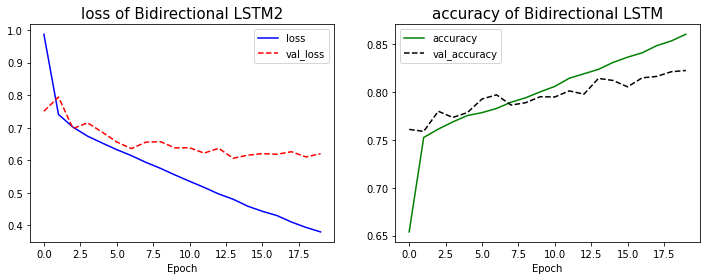

In [168]:
# 양방향 lstm 학습결과 확인
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.title('loss of Bidirectional LSTM2', fontsize= 15)
plt.plot(lstm2_history.history['loss'], 'b-', label='loss')
plt.plot(lstm2_history.history['val_loss'],'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.title('accuracy of Bidirectional LSTM', fontsize= 15)
plt.plot(lstm2_history.history['accuracy'], 'g-', label='accuracy')
plt.plot(lstm2_history.history['val_accuracy'],'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show

vocab_size를 전체 단어에서 빈도수 1인 단어들로 제외하고 돌린 rnn이 가장 성능이 좋다

다음시간
- 파라미터 튜닝 -> vocab_size => 빈도수 2회까지 삭제한 단어들로로
- bert 모델